In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Slump.csv',sep='\t')

In [6]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [7]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [8]:
df.dtypes

Cement                                float64
Slag                                  float64
Fly ash                               float64
Water                                 float64
SP                                    float64
Coarse Aggr.                          float64
Fine Aggr.                            float64
SLUMP(cm)                             float64
FLOW(cm)                              float64
Compressive Strength (28-day)(Mpa)    float64
dtype: object

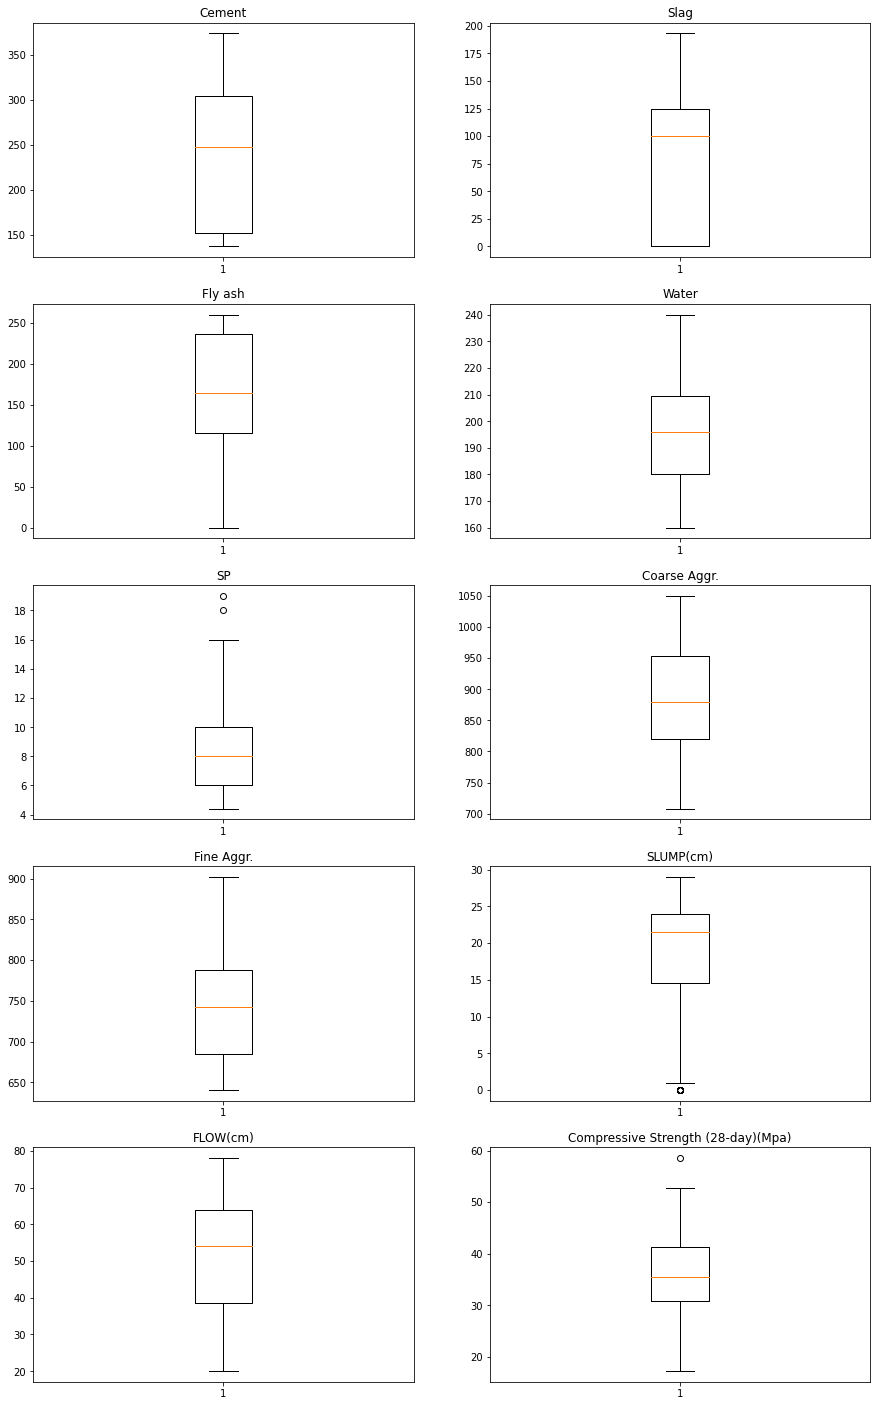

In [12]:
plt.figure(figsize=(15,25))
count = 1
for col in df:
  plt.subplot(5,2,count)
  plt.boxplot(df[col])
  plt.title(col)
  count += 1

plt.show()

In [14]:
# Checking the correlation
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445656
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331522
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444380
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254320
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037909
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160610
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154532
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223499
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124189
Compressive Strength (28-day)(Mpa),0.445656,-0.331522,0.444380,-0.254320,-0.037909,-0.160610,-0.154532,-0.223499,-0.124189,1.000000


In [15]:
# split X and y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [17]:
X.shape , y.shape

((103, 9), (103,))

In [18]:
y = y.reshape(-1,1)

### Feature Scaling
Whenever we are dealing with KNN algorithm, we should do the feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [23]:
#importing the model and metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
mse = []
r2 = []
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse_i = mean_squared_error(y_test,y_pred)
    mse.append(mse_i)
    r2_i = r2_score(y_test,y_pred)
    r2.append(r2_i)

### MSE v/s K-value


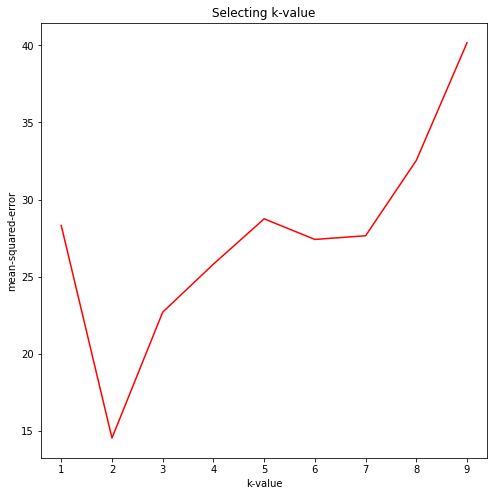

In [28]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(1,10),mse,'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title("Selecting k-value")
plt.show()

In [29]:
# Model Building
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

### Model Building

In [31]:
r2_score(y_test,y_pred)

0.8028411170170824